In [1]:
# import classy module
from classy import Class
import matplotlib.pyplot as plt
from math import pi
import numpy as np

If module ``classy`` doesn't exist, we first need to compile that code and create the wrapper, go to the Terminal and ``cd`` into this directory.
- ``cd class_public-3.3.0``
- ``make -j``
This should run and the last line will remark on its success

In [2]:
# create instance of the class "Class"
LambdaCDM = Class()
# pass input parameters
LambdaCDM.set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842})
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
# run class
LambdaCDM.compute()

In [3]:
# get all C_l output
cls = LambdaCDM.lensed_cl(2500)
# To check the format of cls
cls.keys()

dict_keys(['tt', 'ee', 'te', 'bb', 'pp', 'tp', 'ell'])

In [4]:
ll = cls['ell'][2:]
clTT = cls['tt'][2:]
clEE = cls['ee'][2:]
clPP = cls['pp'][2:]

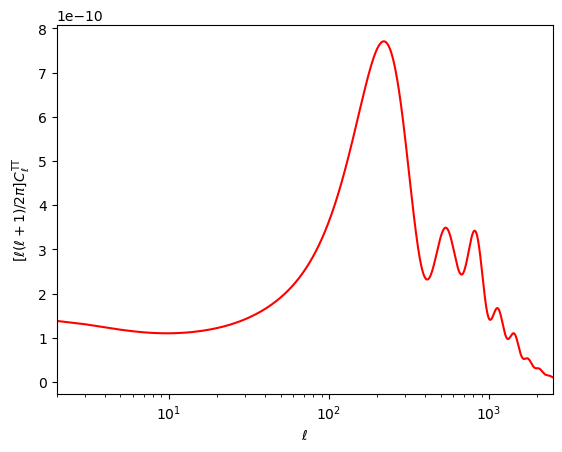

In [5]:
# plot C_l^TT
plt.figure(1)
plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
plt.plot(ll,clTT*ll*(ll+1)/2./pi,'r-')

In [6]:
# get P(k) at redhsift z=0
kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk = [] # P(k) in (Mpc/h)**3
h = LambdaCDM.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk.append(LambdaCDM.pk(k*h,0.)*h**3) # function .pk(k,z)

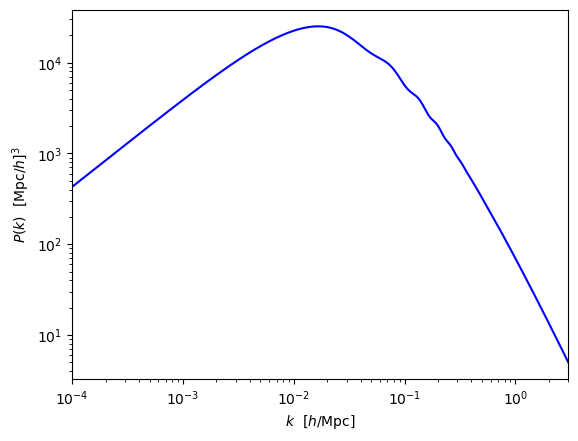

In [7]:
# plot P(k)
plt.figure(2)
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk,Pk,'b-')

In [8]:
LambdaCDM.pars

{'omega_b': 0.0223828,
 'omega_cdm': 0.1201075,
 'h': 0.6781,
 'A_s': 2.100549e-09,
 'n_s': 0.9660499,
 'tau_reio': 0.05430842,
 'output': 'tCl,pCl,lCl,mPk',
 'lensing': 'yes',
 'P_k_max_1/Mpc': 3.0}

In [9]:
LambdaCDM.omega_b()

0.0223828

In [10]:
LambdaCDM.Omega0_cdm() * LambdaCDM.h()**2

0.12010750000000002